# STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
## ÏÇºÏÑ± 5ÎÖÑÏπò
- ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
- ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)
- **ÎÇ†ÏßúÎ•º 5ÎÖÑÏúºÎ°ú ÎäòÎ†§ÏÑú Ï§ÄÎπÑ!**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6Î°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2016-08-31    32400.0
2016-09-01    31740.0
2016-09-02    31940.0
2016-09-05    32120.0
2016-09-06    32860.0
Name: Close, dtype: float64

# STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î°úÍ∑∏ Î≥ÄÌôò

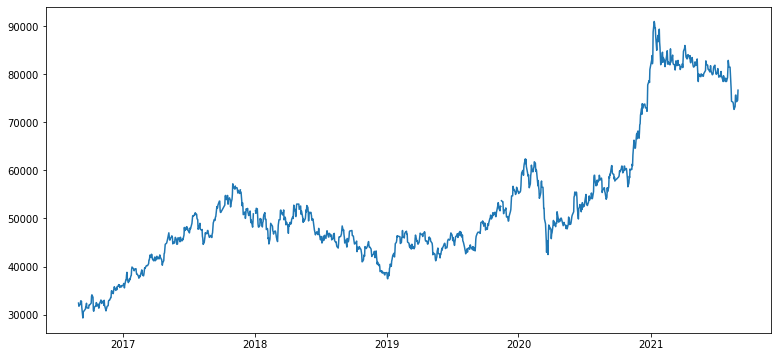

In [2]:
# Í∑∏ÎûòÌîÑ ÌôïÏù∏

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

In [3]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Close, dtype: float64)

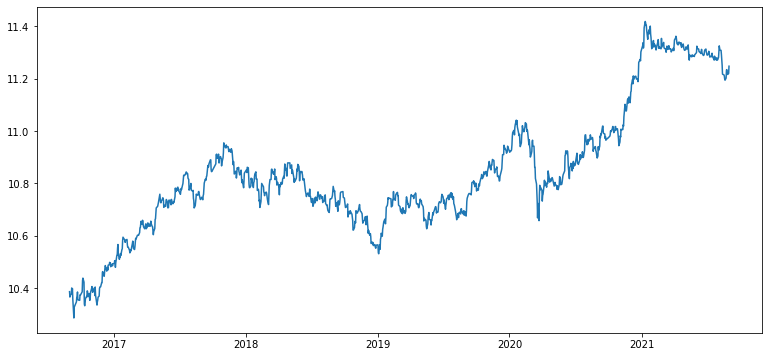

In [4]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ ÌõÑ Îã§Ïãú Í∑∏ÎûòÌîÑ ÌôïÏù∏
ts_log = np.log(ts)
plt.plot(ts_log)

- Í∑∏ÎûòÌîÑ ÏÉÅÏúºÎ°úÎäî ÌÅ∞ Î≥ÄÌôîÍ∞Ä Ïïà ÎäêÍª¥Ï†∏ÏÑú ÏàòÏπòÎ°ú ÎπÑÍµêÎ•º Ìï¥Î¥êÏïº Ìï† Í≤É Í∞ôÎã§.

# STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏


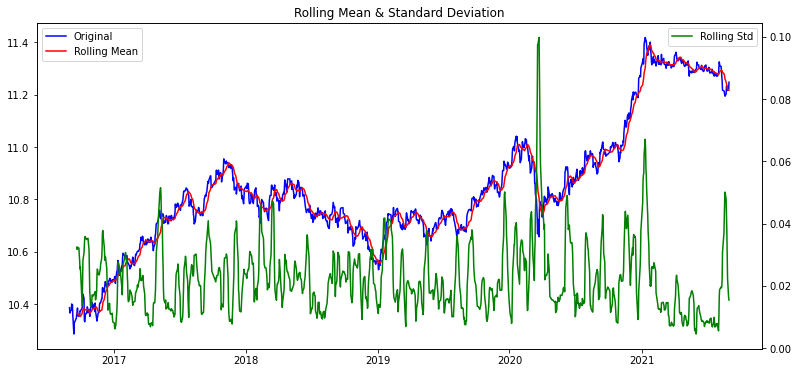

In [5]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
     # Ï∂ïÏùÑ 2Í∞úÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÎààÏóê Ïûò Î≥¥Ïù¥Í≤å Ìï¥Ï§å
    ax1 = plt.subplot(111)
    ax2 = ax1.twinx()
    orig, = ax1.plot(timeseries, color='blue',label='Original')    
    mean, = ax1.plot(rolmean, color='red', label='Rolling Mean')
    std, = ax2.plot(rolstd, color='green', label='Rolling Std')
    label = [orig, mean]
    ax1.legend(label, [i.get_label() for i in label], loc=2)
    ax2.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
plot_rolling_statistics(ts_log, window=12) # timestepÏùÄ 1ÎÖÑÏúºÎ°ú

In [6]:
#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
augmented_dickey_fuller_test(ts) # Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ

Results of Dickey-Fuller Test:
Test Statistic                   -1.057416
p-value                           0.731752
#Lags Used                       18.000000
Number of Observations Used    1209.000000
Critical Value (1%)              -3.435770
Critical Value (5%)              -2.863934
Critical Value (10%)             -2.568044
dtype: float64


In [7]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.352166
p-value                           0.604982
#Lags Used                        0.000000
Number of Observations Used    1227.000000
Critical Value (1%)              -3.435691
Critical Value (5%)              -2.863898
Critical Value (10%)             -2.568026
dtype: float64


- pÍ∞íÏù¥ Ï¢Ä Ï§ÑÏñ¥Îì§Í∏∞Îäî ÌñàÏßÄÎßå Ïó¨Ï†ÑÌûà Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å Ìï† Ïàò ÏûàÎäî ÏàòÏ§ÄÏùÄ ÏïÑÎãàÎã§.

- Ïù¥Í±∏Î°ú ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Ï£ºÏû•ÌïòÎ©¥ Ïù¥ÏÉÅÌïú ÏÇ¨Îûå Ï∑®Í∏âÏùÑ Î∞õÏùÑ ÎìØ

- Ï∞®Î∂ÑÏù¥ ÌïÑÏöîÌïòÎØÄÎ°ú `d`Îäî 1 Ïù¥ÏÉÅÏùò Í∞íÏù¥ ÎÇòÏò¨Í≤ÉÏù¥Îã§.

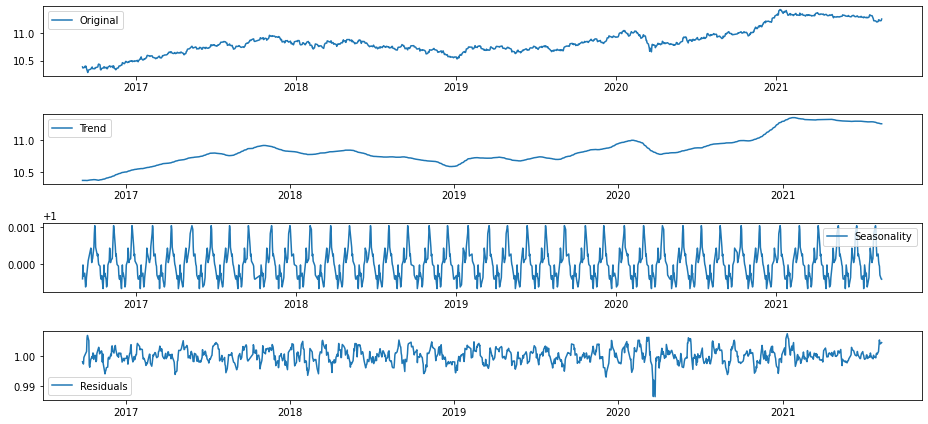

In [8]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
# model: Ï£ºÍ∏∞Ï†Å Î≥ÄÌôîÏùò ÌÅ¨Í∏∞ÎÇò Ï†ÑÏ≤¥Ï†ÅÏù∏ levelÏùò variationÏù¥ ÏùºÏ†ïÌï† ÎïåÏóêÎäî additive
# model: ÏãúÍ∞ÑÏùò ÌùêÎ¶ÑÏóê ÎπÑÎ°ÄÌïòÍ≤å Î≥ÄÌôîÌïúÎã§Î©¥ multiplicative
# Í≤ΩÏ†ú ÏßÄÌëú Í¥ÄÎ†® ÌÉÄÏûÑÏãúÎ¶¨Ï¶àÎäî multiplicative modelÏùÑ Îî∞Î•¥Îäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§
# https://yoongaemii.github.io/seasonal_decomposition

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [9]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.027767e+01
p-value                        3.852391e-18
#Lags Used                     1.700000e+01
Number of Observations Used    1.180000e+03
Critical Value (1%)           -3.435904e+00
Critical Value (5%)           -2.863992e+00
Critical Value (10%)          -2.568076e+00
dtype: float64


# STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

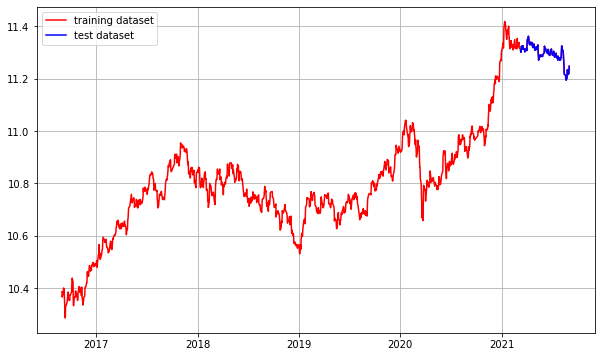

In [10]:
# ÏµúÍ∑ºÎÇ†Ïßú Í∏∞Ï§ÄÏúºÎ°ú 10%Î•º ÌÖåÏä§Ìä∏ ÏÖãÏúºÎ°ú

train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

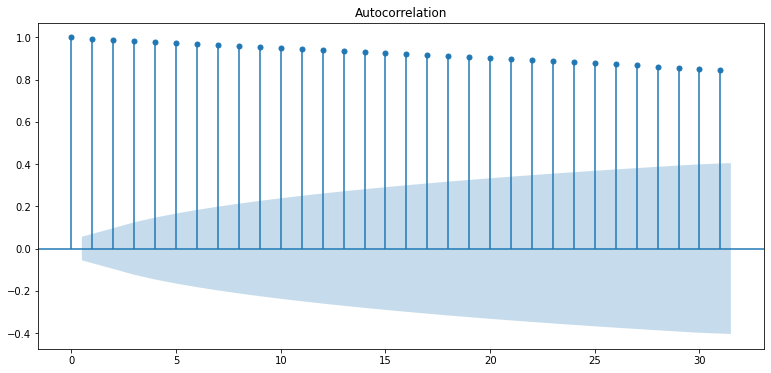

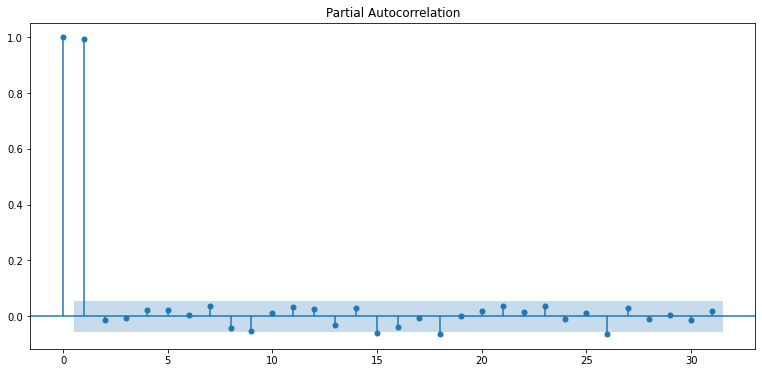

In [11]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- `PACF` 1Ïùò Time lagÏóêÏÑú 1Ïóê Í∞ÄÍπåÏö¥ Í∞íÏù¥ ÎÇòÏò§Í≥† Ïù¥ÌõÑÏóê Í∏âÍ≤©Ìûà Í∞êÏÜå
- Îã§Î•∏ ÏãúÏ∞®ÏôÄ Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÏúºÎØÄÎ°ú AR Î™®Îç∏Ïùò ÏãúÏ∞®Îäî `p=1`Î°ú ÏÑ§Ï†ïÌïòÎ©¥ Îê† Í≤É Í∞ôÎã§
- `ACF` Í∑∏ÎûòÌîÑÎäî ÏïÑÏ£º ÏÑúÏÑúÌûà Í∞êÏÜåÌïòÍ≥† ÏûàÏñ¥ÏÑú `q` Í∞íÏùÑ Ï†ïÌï† ÏàòÎäî ÏóÜÎã§.
- (1,0,0) ÏùºÎã® ÏãúÎèÑ!

Results of Dickey-Fuller Test:
Test Statistic                  -34.167317
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1226.000000
Critical Value (1%)              -3.435695
Critical Value (5%)              -2.863900
Critical Value (10%)             -2.568027
dtype: float64


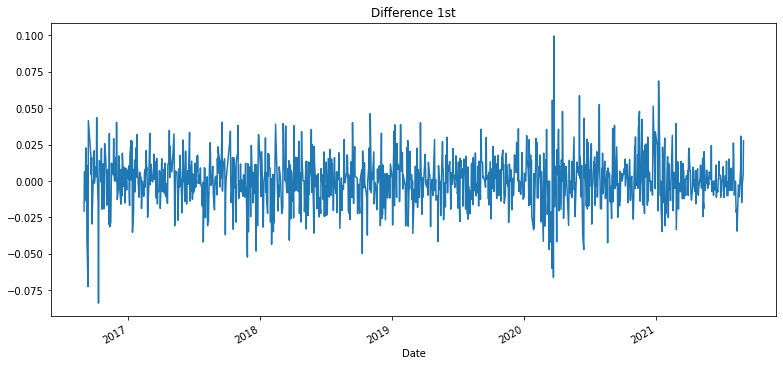

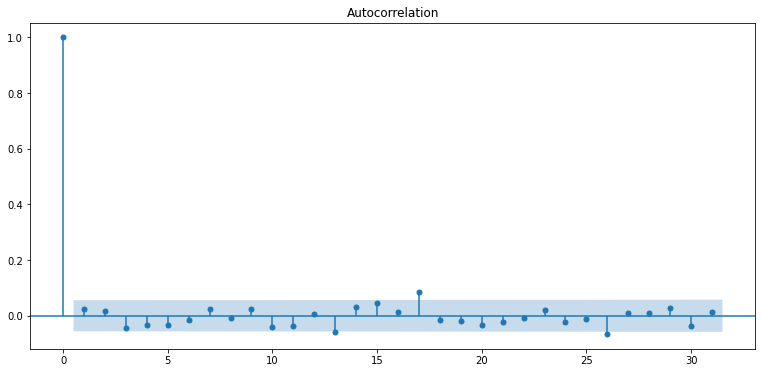

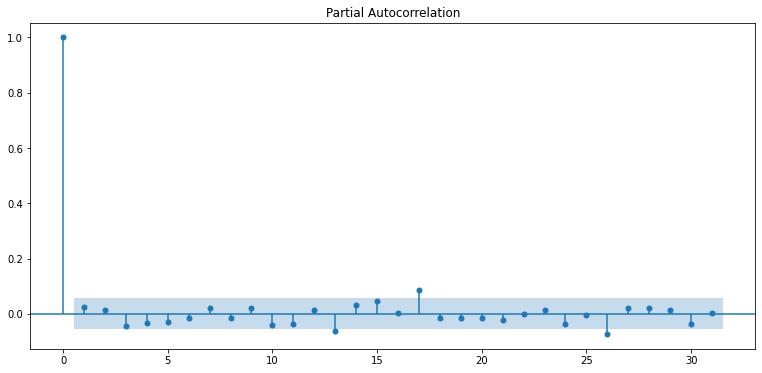

In [12]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ACF, PACF Îã§Ïãú ÌôïÏù∏
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

- 1Ï∞® Ï∞®Î∂ÑÎßåÏóê Ïù¥Ï†ïÎèÑ ÏïàÏ†ïÏÑ±Ïù¥Î©¥ 2Ï∞® Ï∞®Î∂ÑÍπåÏßÄÎäî ÌïÑÏöî ÏóÜÏùÑ Í≤É Í∞ôÎã§.
- `d=1`ÎèÑ ÎÑòÏπòÎäî Í∞êÏù¥ ÏûàÎã§. `p`Îûë `q`Í∞Ä Î™®Îëê 0Ïù¥ ÎêòÎäîÎç∞...
- (0,1,0)Í∞Ä ÏùòÎØ∏ ÏûàÎäî Í∞íÏù∏Í∞Ä..??
- AR Î™®Îç∏Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ≥† (1,1,0)ÎèÑ ÏãúÎèÑ!

# STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [13]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
# trend: ÏÉÅÏàòÎ•º Ìè¨Ìï®Ìï†ÏßÄ Ïó¨Î∂Ä
# disp: ÏàòÎ†¥Ï†ïÎ≥¥ Ï∂úÎ†• Ïó¨Î∂Ä

# Build Model
model_100 = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model_100.fit(trend='nc', disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1105
Model:                     ARMA(1, 0)   Log Likelihood                2895.757
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 01 Sep 2021   AIC                          -5787.515
Time:                        17:31:50   BIC                          -5777.499
Sample:                             0   HQIC                         -5783.727
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Close     1.0000   9.67e-06   1.03e+05      0.000       1.000       1.000
                                    Roots                                    
                  Real          Imaginary         

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

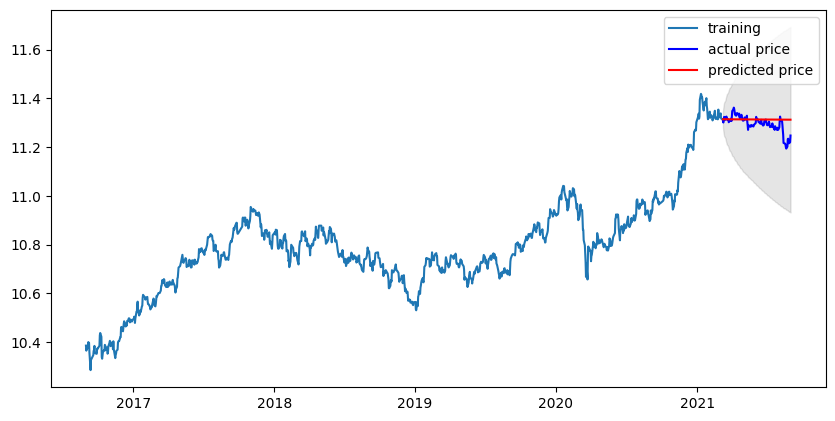

In [14]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [15]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  8459927.787038881
MAE:  2050.2830730858213
RMSE:  2908.5955007595817
MAPE: 2.62%


In [16]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

# Build Model
model_110 = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model_110.fit(trend='nc', disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1104
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2899.763
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 01 Sep 2021   AIC                          -5795.527
Time:                        17:31:50   BIC                          -5785.513
Sample:                             1   HQIC                         -5791.739
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close     0.0191      0.030      0.636      0.525      -0.040       0.078
                                    Roots                                    
                  Real          Imaginary   

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

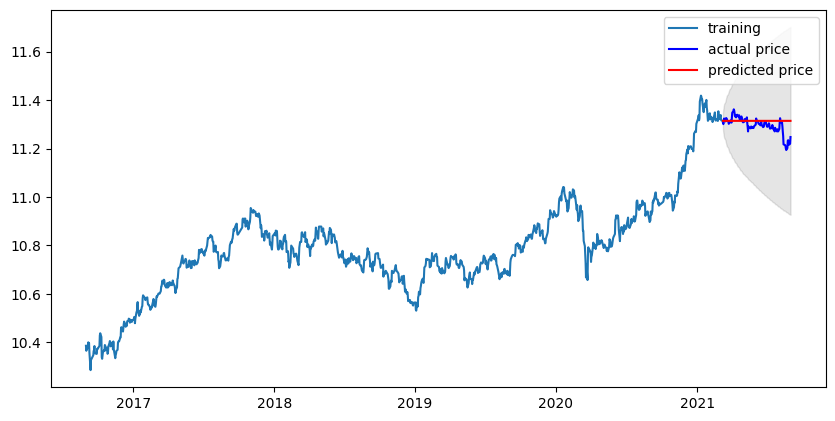

In [17]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [18]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  8821176.26921799
MAE:  2103.192942749818
RMSE:  2970.046509605193
MAPE: 2.68%


- Î™®ÏàòÎ•º Ï°∞Ï†àÌï¥Î¥§ÏúºÎÇò Îëò Îã§ 3% ÏàòÏ§ÄÏóê Î®∏Î¨ºÎ†ÄÎã§.

- t- test Í∞íÏùÑ Ï§ÑÏù¥Î†§Í≥† ÏÉÅÏàòÎ•º Ï†úÍ±∞Ìï¥Î¥§ÎäîÎç∞ Ïç© ÎßàÏùåÏóêÎäî Ïïà Îì†Îã§. Îçî Ï§ÑÏñ¥Ïïº Ìï† Í≤É Í∞ôÏùÄÎç∞ „Ö†„Ö†

- Ï∞®Î∂ÑÏù¥ 0ÏùºÎïå Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÎã§Îãà .. ÏôúÎïåÎ¨∏Ïóê..? ;„ÖÇ;

## ÏµúÏ¢ÖÍ≤∞Í≥º (1, 0, 0) Ïùº Îïå 2.62%

---
---
---

# STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
## ÎπôÍ∑∏Î†à 5ÎÖÑÏπò
- ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
- ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)


In [19]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/005180.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2016-08-31    55200.0
2016-09-01    54900.0
2016-09-02    56000.0
2016-09-05    55600.0
2016-09-06    55900.0
Name: Close, dtype: float64

# STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î°úÍ∑∏ Î≥ÄÌôò

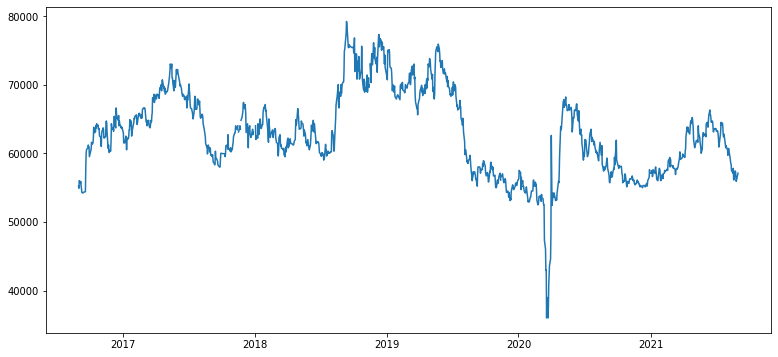

In [20]:
# Í∑∏ÎûòÌîÑ ÌôïÏù∏
# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

In [21]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Close, dtype: float64)

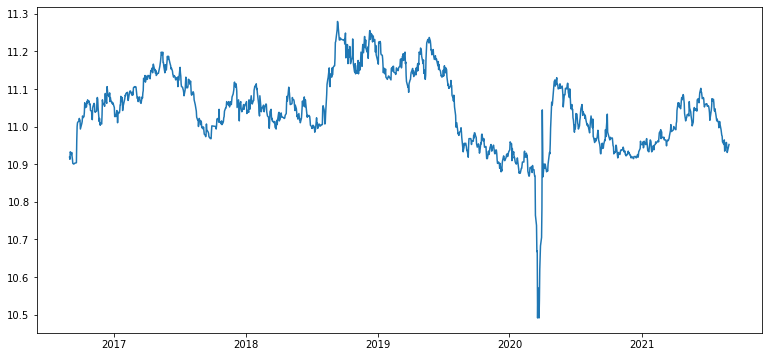

In [22]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ ÌõÑ Îã§Ïãú Í∑∏ÎûòÌîÑ ÌôïÏù∏
ts_log = np.log(ts)
plt.plot(ts_log)

# STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏


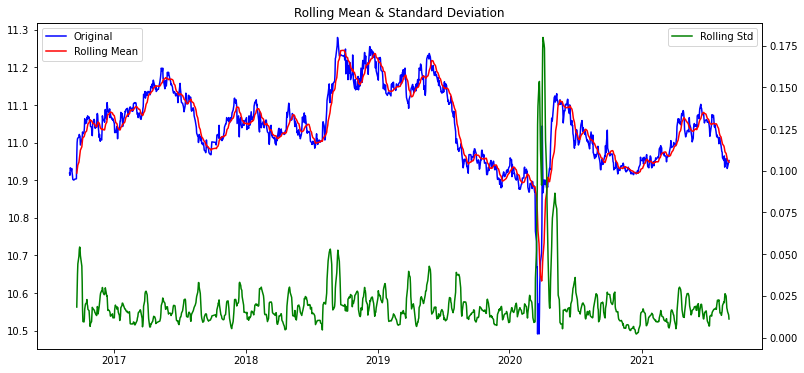

In [23]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
    
plot_rolling_statistics(ts_log, window=12)

In [24]:
#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
    
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -2.781545
p-value                           0.060959
#Lags Used                       17.000000
Number of Observations Used    1210.000000
Critical Value (1%)              -3.435766
Critical Value (5%)              -2.863932
Critical Value (10%)             -2.568043
dtype: float64


In [25]:
#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
    
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.881075
p-value                           0.047593
#Lags Used                       17.000000
Number of Observations Used    1210.000000
Critical Value (1%)              -3.435766
Critical Value (5%)              -2.863932
Critical Value (10%)             -2.568043
dtype: float64


- Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ p value Í∞íÏù¥ 0.05 Ïù¥ÌïòÎ°ú ÎÇ¥Î†§Í∞îÏúºÎØÄÎ°ú Ïù¥ ÏÉÅÌÉúÎ°úÎèÑ ÏïàÏ†ïÏ†ÅÏù∏ Í≤É Í∞ôÎã§

- `d=0`ÏùÑ ÏãúÎèÑÌï¥Î≥º Ïàò ÏûàÍ≤†Îã§.

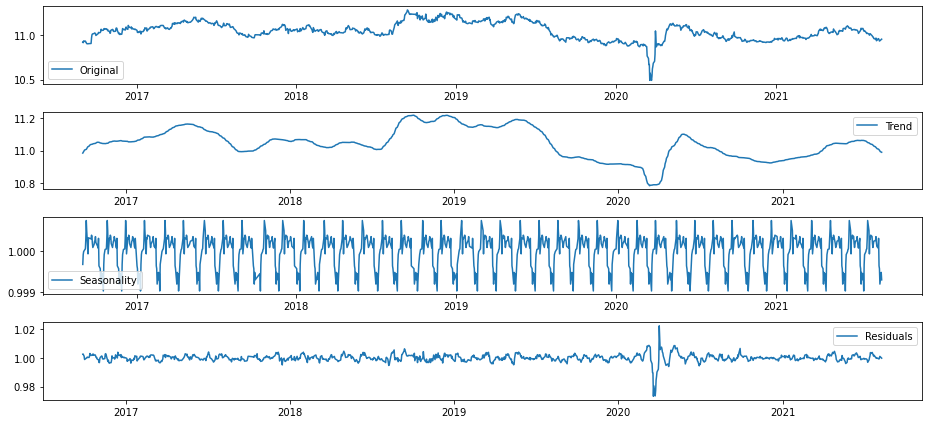

In [26]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
# model: Ï£ºÍ∏∞Ï†Å Î≥ÄÌôîÏùò ÌÅ¨Í∏∞ÎÇò Ï†ÑÏ≤¥Ï†ÅÏù∏ levelÏùò variationÏù¥ ÏùºÏ†ïÌï† ÎïåÏóêÎäî additive
# model: ÏãúÍ∞ÑÏùò ÌùêÎ¶ÑÏóê ÎπÑÎ°ÄÌïòÍ≤å Î≥ÄÌôîÌïúÎã§Î©¥ multiplicative
# Í≤ΩÏ†ú ÏßÄÌëú Í¥ÄÎ†® ÌÉÄÏûÑÏãúÎ¶¨Ï¶àÎäî multiplicative modelÏùÑ Îî∞Î•¥Îäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§
# https://yoongaemii.github.io/seasonal_decomposition

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [27]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -9.524133e+00
p-value                        3.009465e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.177000e+03
Critical Value (1%)           -3.435918e+00
Critical Value (5%)           -2.863999e+00
Critical Value (10%)          -2.568079e+00
dtype: float64


# STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

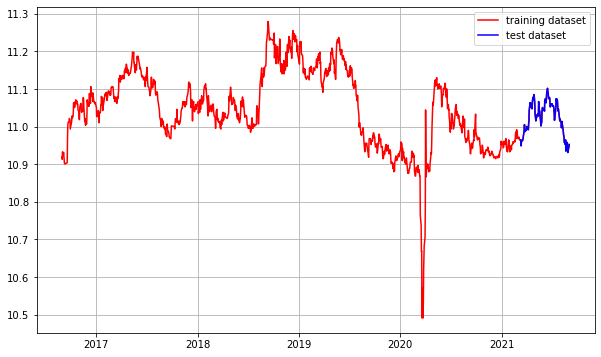

In [28]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

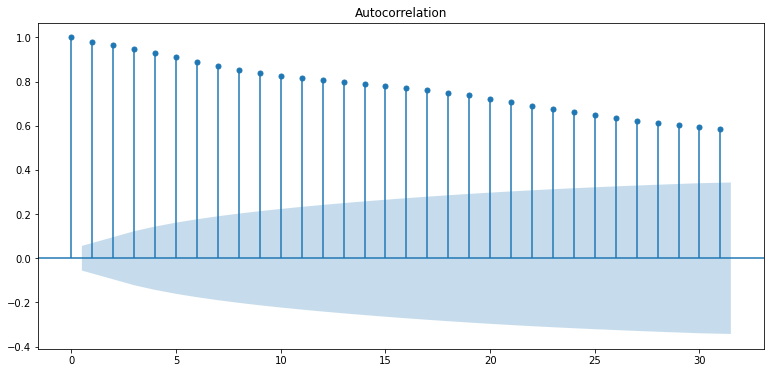

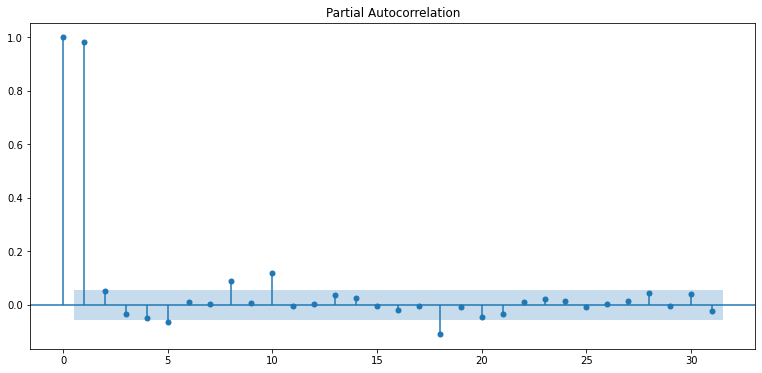

In [29]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- `PACF` Í∑∏ÎûòÌîÑÎ•º Î≥º Îïå `p=1`Ïù¥ Îß§Ïö∞ Ï†ÅÌï©
- `ACF`Îäî Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÏûàÏñ¥ÏÑú `MA`Î•º Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Î©¥ `q=0`ÏúºÎ°ú Îëò Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.
- (1,0,0) ÏãúÎèÑ!

Results of Dickey-Fuller Test:
Test Statistic                -1.415078e+01
p-value                        2.163782e-26
#Lags Used                     8.000000e+00
Number of Observations Used    1.218000e+03
Critical Value (1%)           -3.435730e+00
Critical Value (5%)           -2.863916e+00
Critical Value (10%)          -2.568035e+00
dtype: float64


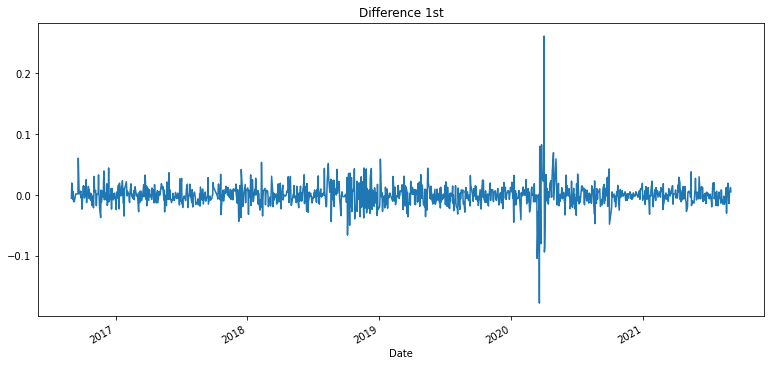

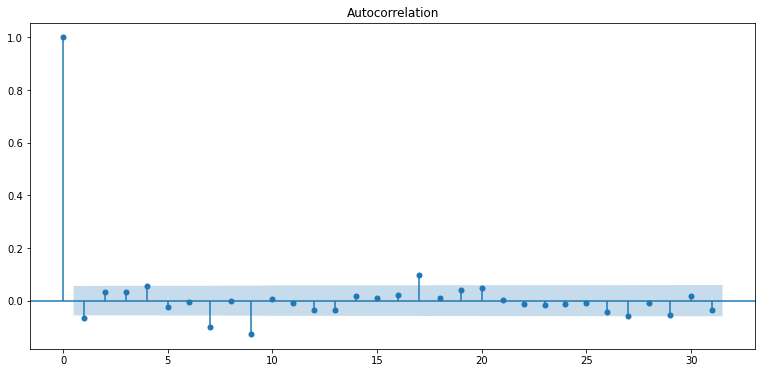

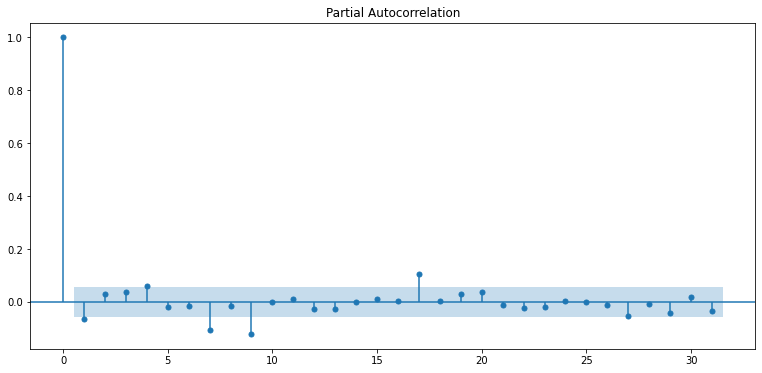

In [30]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ACF, PACF Îã§Ïãú ÌôïÏù∏
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

- ÏÇºÏÑ±Í≥º ÎπÑÏä∑Ìïú ÌòïÌÉúÍ∞Ä ÎÇòÏò§Îäî Í±∏ Î≥¥Î©¥ `d=1`ÏóêÏÑúÏùò Í≤∞Í≥ºÍ∞Ä Îçî ÏïàÏ¢ãÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.
- ÏùºÎã® (1,1,0)ÎèÑ ÏãúÎèÑ Ìï¥Î≥¥Ïûê!

# STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [31]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

# Build Model
model_100 = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model_100.fit(trend='c', disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1105
Model:                     ARMA(1, 0)   Log Likelihood                2809.979
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 01 Sep 2021   AIC                          -5613.958
Time:                        17:31:53   BIC                          -5598.935
Sample:                             0   HQIC                         -5608.276
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.0356      0.032    345.436      0.000      10.973      11.098
ar.L1.Close     0.9829      0.005    181.746      0.000       0.972       0.994
                                    Roots       

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

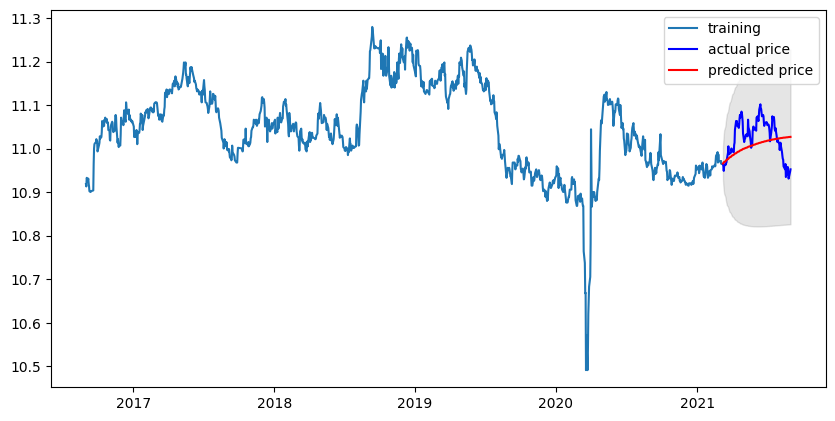

In [32]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [33]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  8366514.231655035
MAE:  2409.14129021989
RMSE:  2892.4927366641796
MAPE: 3.90%


In [34]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

# Build Model
model_110 = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model_110.fit(trend='c', disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1104
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2807.395
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 01 Sep 2021   AIC                          -5608.790
Time:                        17:31:54   BIC                          -5593.770
Sample:                             1   HQIC                         -5603.109
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.203e-05      0.001      0.079      0.937      -0.001       0.001
ar.L1.D.Close    -0.0740      0.030     -2.467      0.014      -0.133      -0.015
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

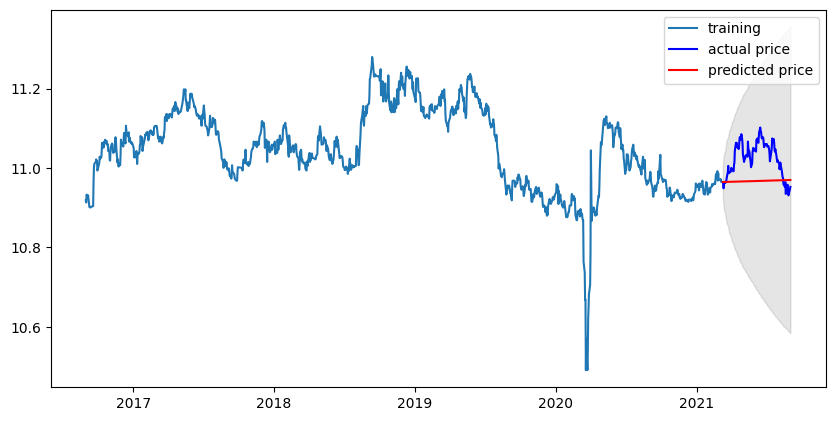

In [35]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [36]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  18935613.685184665
MAE:  3757.6959552032263
RMSE:  4351.507059075587
MAPE: 5.98%


- Ïù¥Î≤à Í≤ΩÏö∞ÏóêÎäî Îëò Îã§ ÏÉÅÏàòÎ•º Í∑∏ÎåÄÎ°ú ÎÜîÎëêÎäîÍ≤å Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÏïòÎã§.
- Ï§ëÍ∞ÑÏóê ÏòàÏ∏°Ìïú Í≤ÉÏ≤òÎüº Ï∞®Î∂ÑÏù¥ 1ÏùºÎïå Í≤∞Í≥ºÍ∞Ä Îçî Ïïà Ï¢ãÏùÄÍ±∞Î≥¥Îãà
- ÎπôÍ∑∏Î†àÎäî ÏôÑÏ†Ñ AR Î™®Îç∏Ïù¥Îã§!
- ÏÉÅÏäπ ÌïòÍ∞ïÏù¥ Î∞òÎ≥µÎêòÎ©∞ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏùºÏ†ïÌïú ÏàòÏ§ÄÏùÑ Ïú†ÏßÄÌï† Í≤ÉÏù¥ÎùºÎäî Í∏∞ÎåÄÎ•º Ìï¥ÎèÑ Ï¢ãÎã§.

## ÏµúÏ¢Ö Í≤∞Í≥º (1, 0, 0) Ïùº Îïå 3.90%

---
---
---

# STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
## ÏÑúÏö∏ Í∏∞Ï§Ä Ïó¥ÌùòÍ∞ÑÏùò Îß§ ÏãúÍ∞Ñ ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞
[Ï∂úÏ≤ò](https://www.visualcrossing.com/weather-data)
- ÏπºÎüº Ï¢ÖÎ•ò: Date time, Maximum Temperature, Minimum Temperature, TemperatureÏùÑ Ìè¨Ìï®Ìïú 22Í∞ú
- Temperature Îßå ÏÇ¨Ïö©

In [37]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/history_data.csv'
df = pd.read_csv(dataset_filepath, index_col='Date time', parse_dates=True)
ts = df['Temperature']

ts.head()

Date time
2021-08-21 00:00:00    24.5
2021-08-21 01:00:00    24.4
2021-08-21 02:00:00    23.9
2021-08-21 03:00:00    24.0
2021-08-21 04:00:00    24.1
Name: Temperature, dtype: float64

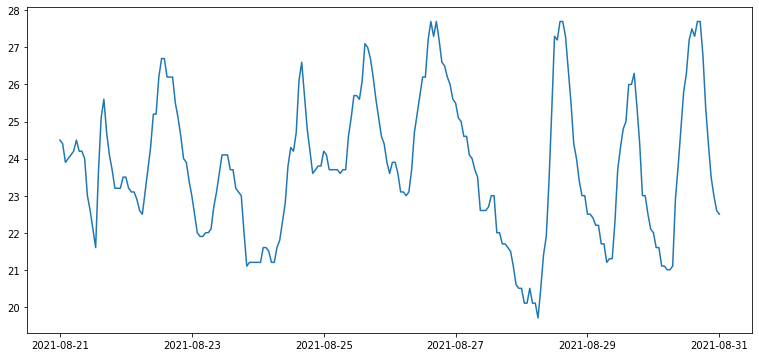

In [38]:
# Í∑∏ÎûòÌîÑ ÌôïÏù∏
# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

# STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- ~Î°úÍ∑∏ Î≥ÄÌôò~ ÏïàÌïòÎäîÍ≤å ÎÇ´Îã§

In [39]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Temperature, dtype: float64)

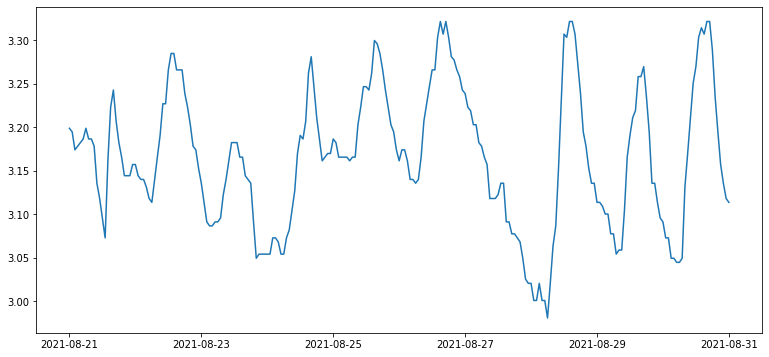

In [40]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ ÌõÑ Îã§Ïãú Í∑∏ÎûòÌîÑ ÌôïÏù∏
ts_log = np.log(ts)
plt.plot(ts_log)

# STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏


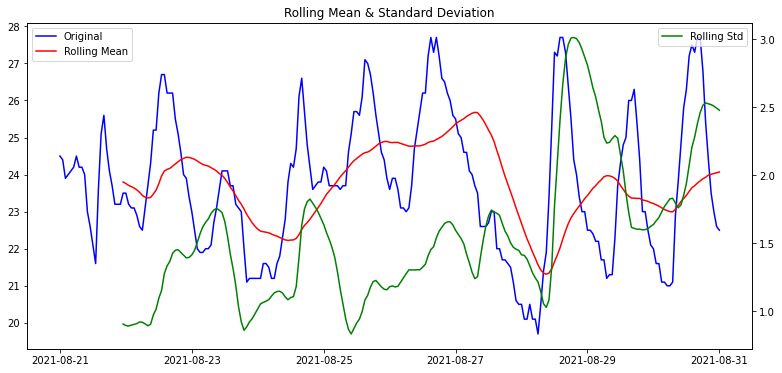

In [41]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
# ÌïòÎ£®Îäî 24ÏãúÍ∞ÑÏù¥ Î∞òÎ≥µÎêòÎØÄÎ°ú windowÎ•º 24Î°ú Ïû°ÏïÑÎ¥Ñ

plot_rolling_statistics(ts, window=24)

In [42]:
# Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -5.295403
p-value                          0.000006
#Lags Used                       4.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [43]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -5.226885
p-value                          0.000008
#Lags Used                       4.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


- Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Ïò§ÌûàÎ†§ p valueÍ∞Ä Ï¶ùÍ∞ÄÌïúÎã§
- Î≥ÄÌôò ÏóÜÏù¥ Ïõê Í∞íÏúºÎ°ú ÏßÑÌñâÌïòÏûê
- `d=0`ÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Îê† Í≤É Í∞ôÎã§.

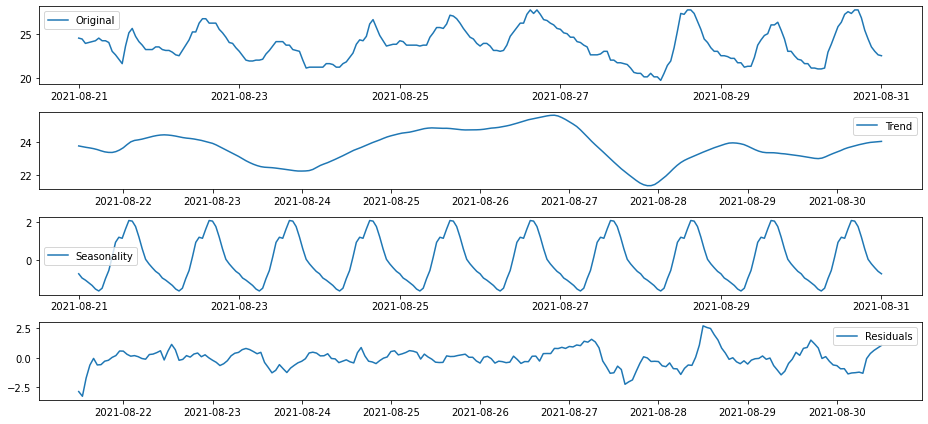

In [44]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts)#, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [45]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.555590
p-value                          0.000002
#Lags Used                       4.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


# STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

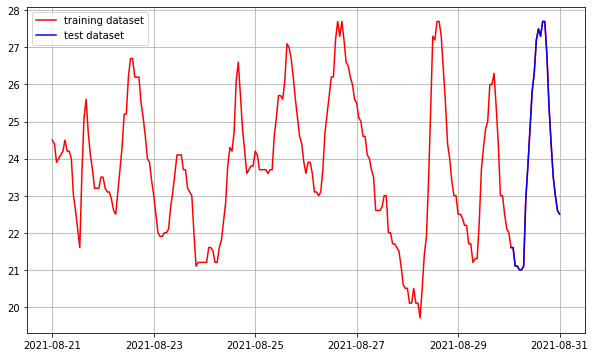

In [46]:
# ÏµúÍ∑º 24ÏãúÍ∞ÑÏùò ÎÇ†Ïî®Î•º ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú

train_data, test_data = ts[:-24], ts[-24:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts, c='r', label='training dataset')  
 # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ tsÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

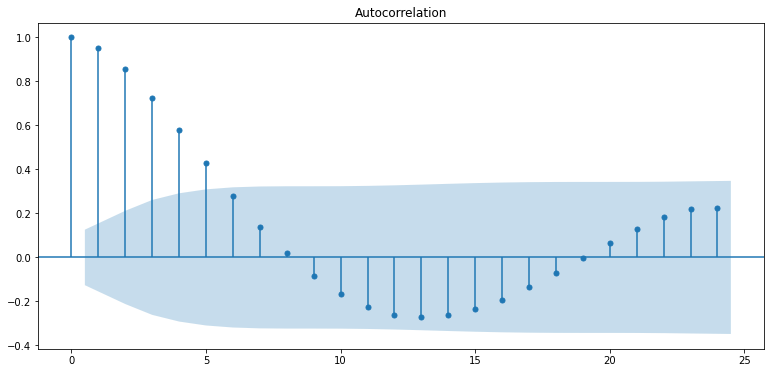

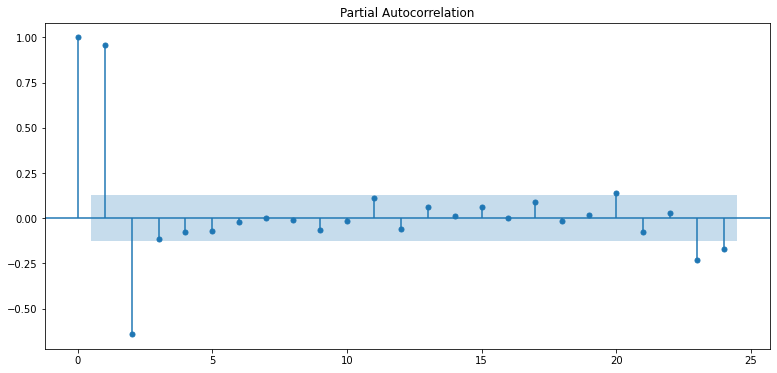

In [47]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞

plot_acf(ts)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- `ACF` Í∑∏ÎûòÌîÑÏóêÏÑúÎäî time lagÏù¥ 6ÏùºÎïå ÌååÎûÄ Í≥µÍ∞ÑÏóê ÏßÑÏûÖÌïòÎØÄÎ°ú `q=5`

- `PACF` Í∑∏ÎûòÌîÑÏóêÏÑúÎäî time lagÏù¥ 3ÏùºÎïå ÌååÎûÄ Í≥µÍ∞ÑÏóê ÏßÑÏûÖÌïòÎØÄÎ°ú `p=2` Í∞Ä Ï†ÅÎãπÌï¥Î≥¥Ïù¥Í∏¥ ÌïòÎäîÎç∞..

- ÏùºÎã® 5Îäî ÎÑàÎ¨¥ ÌÅ∞ ÏàòÏπò Í∞ôÏïÑÏÑú (2, 0, 0)ÏóêÏÑú `q`Îßå Î∞îÍøîÍ∞ÄÎ©¥ÏÑú ÏãúÎèÑÌïòÏûê

Results of Dickey-Fuller Test:
Test Statistic                -6.639470e+00
p-value                        5.455958e-09
#Lags Used                     1.300000e+01
Number of Observations Used    2.260000e+02
Critical Value (1%)           -3.459620e+00
Critical Value (5%)           -2.874415e+00
Critical Value (10%)          -2.573632e+00
dtype: float64


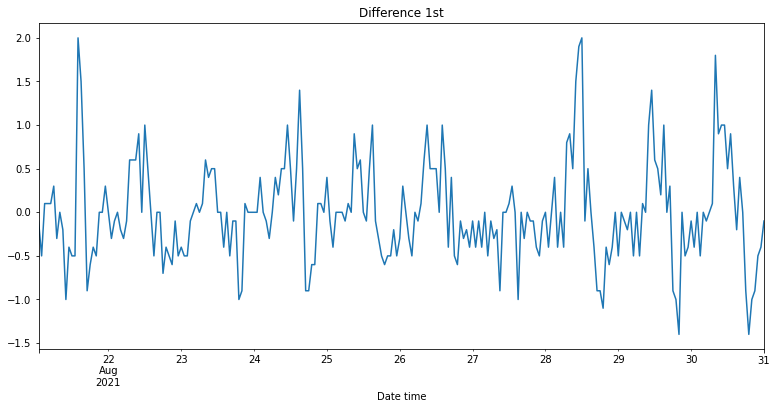

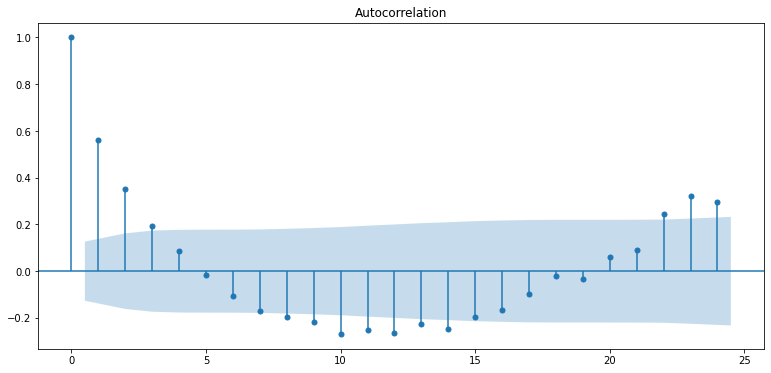

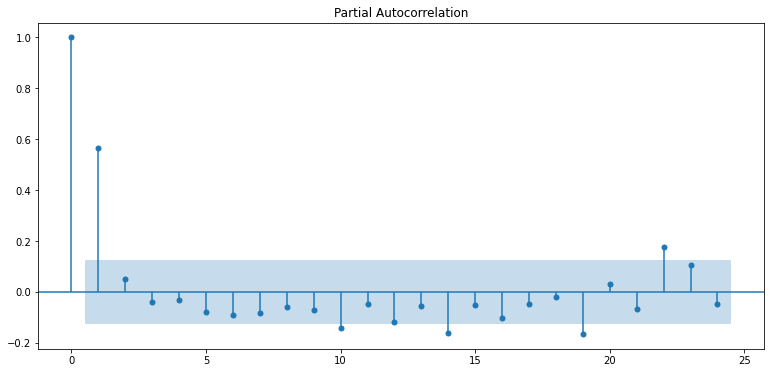

In [48]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ACF, PACF Îã§Ïãú ÌôïÏù∏
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

- `d=1`ÏùºÎïåÎäî `p=1`, `q=2`Í∞Ä Ï†ÅÎãπÌï¥Î≥¥Ïù¥Í∏¥ ÌïúÎã§
- (1, 1, 0)ÏúºÎ°ú ÎëêÍ≥† `q`Í∞íÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ ÌÖåÏä§Ìä∏

# STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [49]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

# Build Model
model_202 = ARIMA(train_data, order=(2, 0, 2))  
fitted_m = model_202.fit(trend='c', disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperature   No. Observations:                  217
Model:                     ARMA(2, 2)   Log Likelihood                -131.794
Method:                       css-mle   S.D. of innovations              0.441
Date:                Wed, 01 Sep 2021   AIC                            275.588
Time:                        17:31:57   BIC                            295.867
Sample:                    08-21-2021   HQIC                           283.780
                         - 08-30-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.7280      0.319     74.269      0.000      23.102      24.354
ar.L1.Temperature     1.7210      0.098     17.595      0.000       1.529       1.913
ar.L2.Temperature    -0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be use

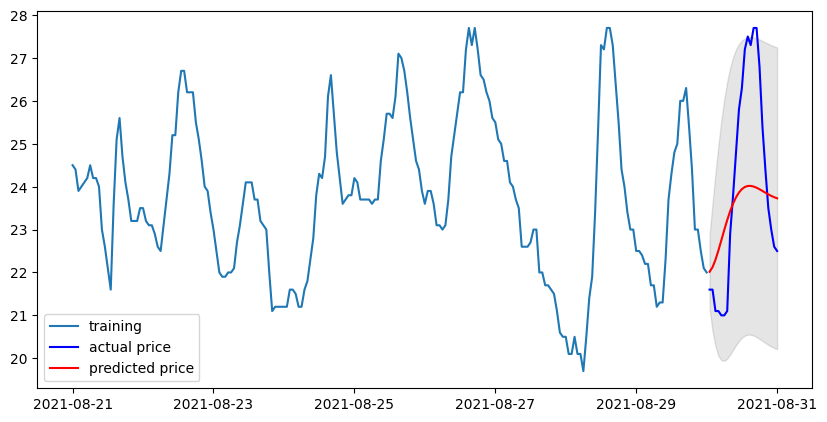

In [50]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [51]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)
# ÏßÄÏàò Î≥ÄÌôò ÏóÜÏù¥ Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4.214299108832196
MAE:  1.7190370619714017
RMSE:  2.0528758142742576
MAPE: 6.91%


In [53]:
# ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

# Build Model
model_112 = ARIMA(train_data, order=(1, 1, 2))  
fitted_m = model_112.fit(trend='nc', disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Temperature   No. Observations:                  216
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -140.516
Method:                       css-mle   S.D. of innovations              0.463
Date:                Wed, 01 Sep 2021   AIC                            289.032
Time:                        17:33:34   BIC                            302.533
Sample:                    08-21-2021   HQIC                           294.486
                         - 08-30-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ar.L1.D.Temperature     0.4911      0.182      2.701      0.007       0.135       0.847
ma.L1.D.Temperature     0.0253      0.191      0.132      0.895      -0.350       0.401
ma.L2.D.Temperat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arim

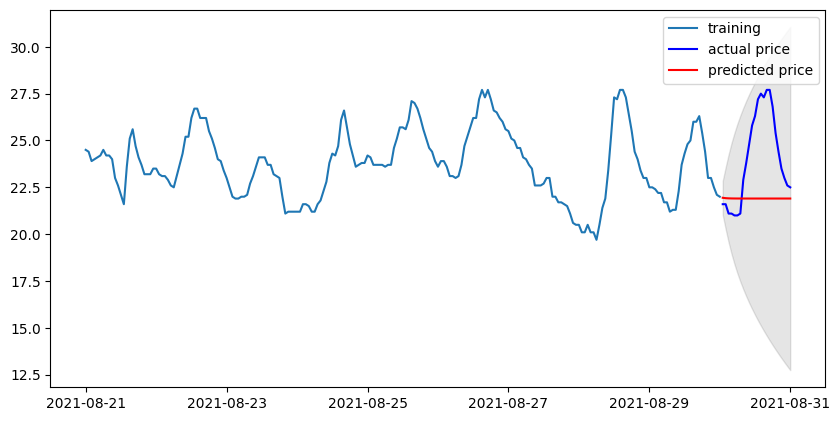

In [54]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [55]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)
# ÏßÄÏàò Î≥ÄÌôò ÏóÜÏù¥ Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10.588672327529247
MAE:  2.572950593911903
RMSE:  3.254024020736363
MAPE: 10.00%


- Ï∞®Î∂ÑÏù¥ ÏóÜÏù¥ `d=0`ÏúºÎ°ú ÎëêÍ≥† ÏßÑÌñâÌñàÏùÑÎïåÎäî ÏÉÅÏàòÎ•º Ï∂îÍ∞ÄÌïòÎäîÍ≤å Í≤∞Í≥ºÍ∞Ä Ï¢ãÍ≥†,
- `d=1` ÏùºÎïåÎäî ÏÉÅÏàòÍ∞Ä ÏóÜÏùÑÎïå Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÏïòÎã§.. Ïã†Í∏∞ÌïòÎÑ§
- (2, 0, 5) ÍπåÏßÄ ÎèåÎ†§Î≥¥Í≥† Ïã∂ÏóàÏúºÎÇò `q=3` Ïù¥ÏÉÅÏúºÎ°ú ÏÑ§Ï†ïÌïòÎãà Ïò§Î•òÍ∞Ä ÎÇ¨Îã§...„Ö†„Ö†
- (2, 0, 2) Ïùº Îïå Í∞ÄÏû• ÎÇÆÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôÄÏÑú `q`Î•º Îçî Ïò¨Î†§Î≥¥Í≥† Ïã∂ÏùÄÎç∞ ÏïÑÍπùÎã§..
- Ï¢Ä Îçî Í≥µÎ∂ÄÌï¥ÏÑú ÌôïÏù∏Ìï¥Î¥êÏïºÍ≤†Îã§!

## ÏµúÏ¢Ö Í≤∞Í≥º (2, 0, 2) Ïùº Îïå 6.91%

---
---
---

# STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
## ÏµúÍ∑º 1ÎÖÑ Í∞ÑÏùò ÎπÑÌä∏ÏΩîÏù∏ ÏãúÏÑ∏
[Ï∂úÏ≤ò](https://www.blockchain.com/ko/charts/market-price?timespan=60days)

- ÏπºÎüº Ï¢ÖÎ•ò: Timestamp, market-price

In [56]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/market-price.csv'
df = pd.read_csv(dataset_filepath, index_col='Timestamp', parse_dates=True)
ts = df['market-price']

ts.head()

Timestamp
2020-09-01    11659.57
2020-09-02    11923.25
2020-09-03    11397.44
2020-09-04    10187.51
2020-09-05    10467.89
Name: market-price, dtype: float64

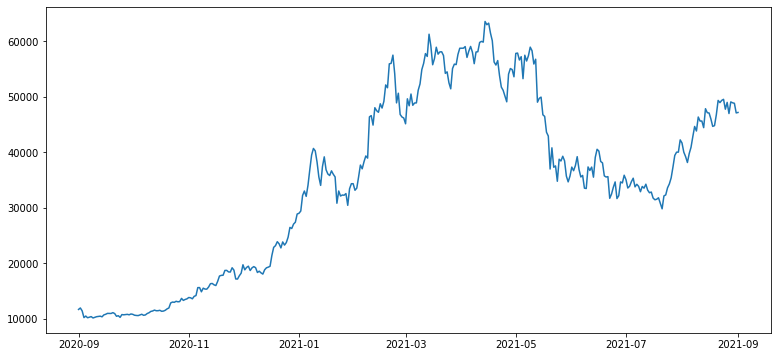

In [57]:
# Í∑∏ÎûòÌîÑ ÌôïÏù∏
# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

# STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î°úÍ∑∏ Î≥ÄÌôò

In [58]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: market-price, dtype: float64)

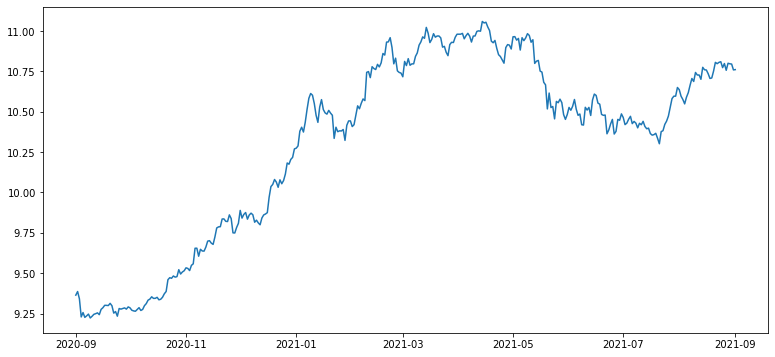

In [59]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ ÌõÑ Îã§Ïãú Í∑∏ÎûòÌîÑ ÌôïÏù∏
ts_log = np.log(ts)
plt.plot(ts_log)

# STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏


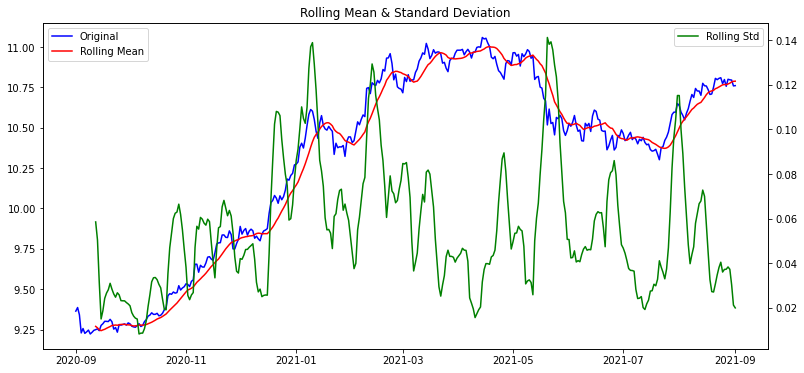

In [60]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù

plot_rolling_statistics(ts_log)

In [61]:
#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
augmented_dickey_fuller_test(ts) # Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ

Results of Dickey-Fuller Test:
Test Statistic                  -1.356430
p-value                          0.602977
#Lags Used                       2.000000
Number of Observations Used    363.000000
Critical Value (1%)             -3.448494
Critical Value (5%)             -2.869535
Critical Value (10%)            -2.571029
dtype: float64


In [62]:
augmented_dickey_fuller_test(ts_log) # Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ

Results of Dickey-Fuller Test:
Test Statistic                  -1.439149
p-value                          0.563371
#Lags Used                       1.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


- Î°úÍ∑∏Î≥ÄÌôòÏùÑ Ìï¥Ï§òÎèÑ ÏàòÏπòÏùò Î≥ÄÌôîÍ∞Ä ÌÅ¨ÏßÄ ÏïäÎã§ „Ö†„Ö†
- `d=1` Ïù¥ÏÉÅÏù¥ Î¨¥Ï°∞Í±¥ ÌïÑÏöîÌïú ÏÉÅÌô©

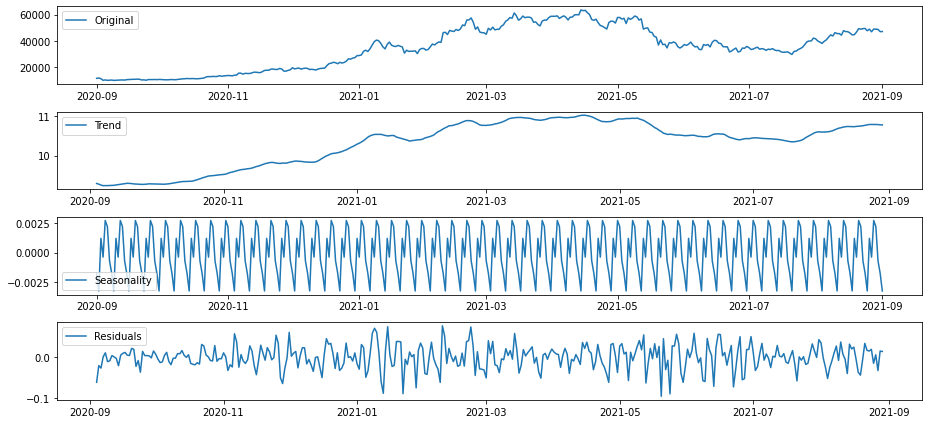

In [63]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log)#, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [64]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.094201e+01
p-value                        9.245381e-20
#Lags Used                     7.000000e+00
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64


# STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

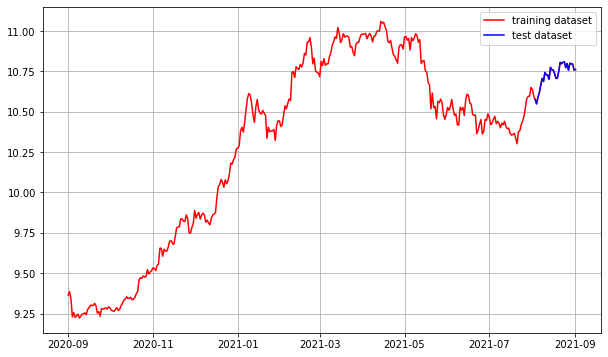

In [65]:
# ÏµúÍ∑º 30Ïùº Í∞ÑÏùò Í∞ÄÍ≤©ÏùÑ ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú

train_data, test_data = ts_log[:-30], ts_log[-30:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  
 # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ tsÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

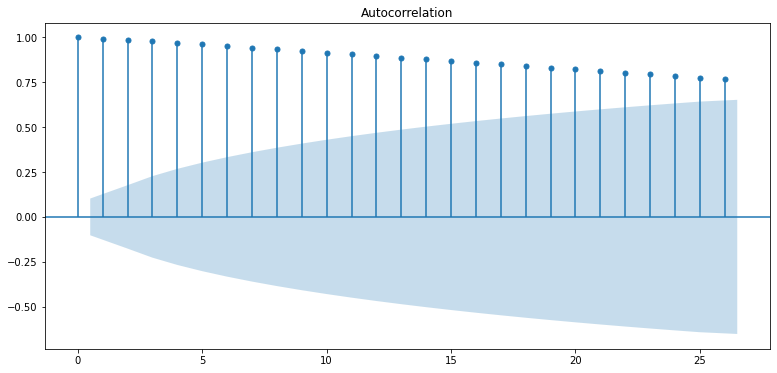

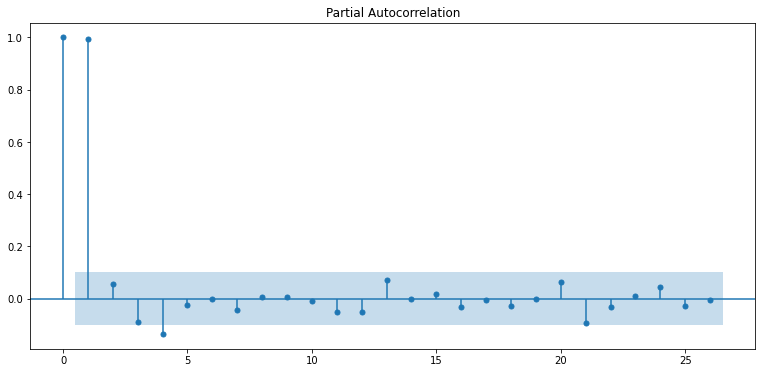

In [66]:
plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- Ïó≠ÏãúÎÇò AR Î™®Îç∏Ïóê Í∞ÄÍπåÏö¥ ÌòïÌÉúÍ∞Ä ÎÇòÏôîÎã§.
- Ï∞®Î∂ÑÌï¥ÏÑú ÌôïÏù∏Ìï¥Î¥êÏïºÍ≤†ÏßÄÎßå ÏÇºÏÑ±Ïùò ÏºÄÏù¥Ïä§Î•º ÏÉùÍ∞ÅÌï¥Î≥¥Î©¥ ..
- (1,0,0) Î∂ÄÌÑ∞ Î™áÍ∞ÄÏßÄ ÏãúÎèÑÌï¥Î≥¥Ïûê

Results of Dickey-Fuller Test:
Test Statistic                 -20.523575
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


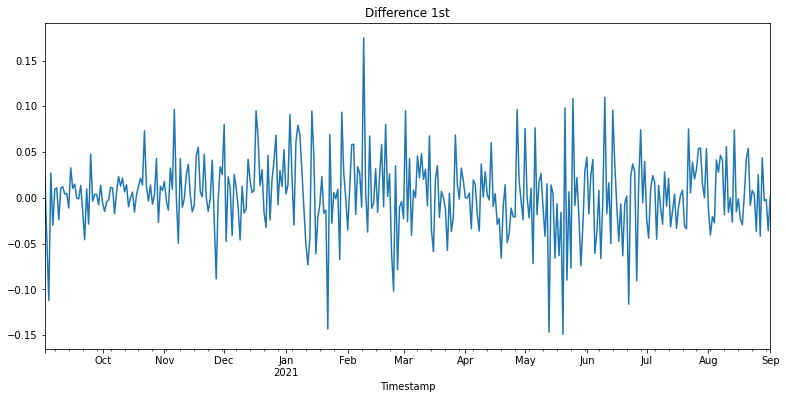

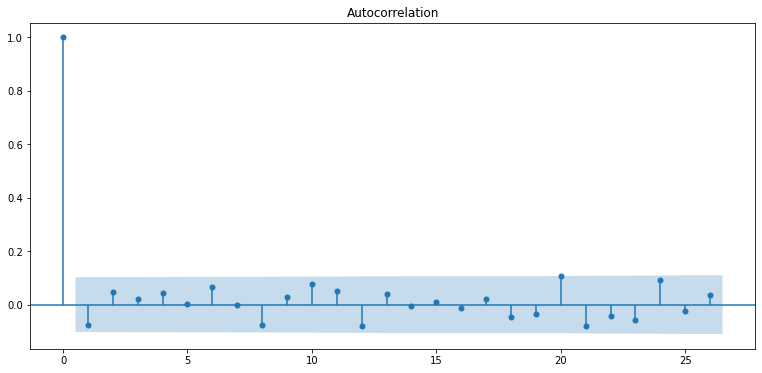

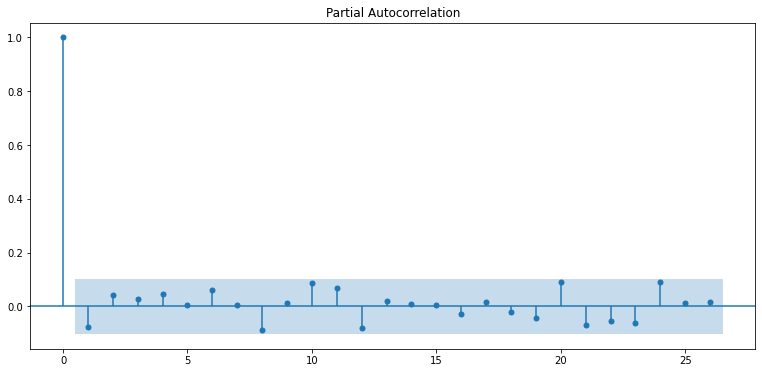

In [67]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ACF, PACF Îã§Ïãú ÌôïÏù∏
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

- ÏïûÏóêÏÑú Î™áÎ≤à Î≥∏ ÌòïÌÉúÎùºÏÑú ÏΩîÎ©òÌä∏Îäî Ïä§ÌÇµ
- (1, 1, 0) Î∂ÄÌÑ∞ ÏãúÎèÑ

# STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [68]:
# Build Model
model_100 = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model_100.fit(trend='nc', disp=-1)  
print(fitted_m.summary())


                              ARMA Model Results                              
Dep. Variable:           market-price   No. Observations:                  336
Model:                     ARMA(1, 0)   Log Likelihood                 578.459
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 01 Sep 2021   AIC                          -1152.917
Time:                        17:33:40   BIC                          -1145.283
Sample:                    09-01-2020   HQIC                         -1149.874
                         - 08-02-2021                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ar.L1.market-price     1.0000   9.66e-06   1.03e+05      0.000       1.000       1.000
                                    Roots                                    
                  Real       

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

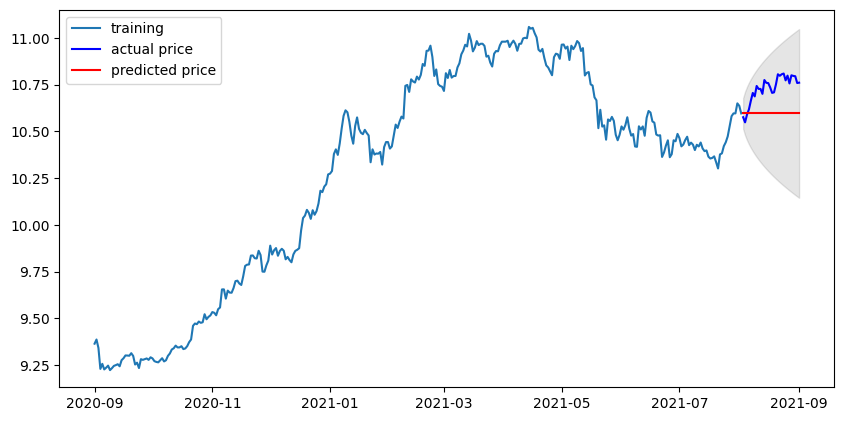

In [69]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [70]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  44411512.608213425
MAE:  6099.121872492584
RMSE:  6664.196321253856
MAPE: 12.94%


In [71]:
# Build Model
model_112 = ARIMA(train_data, order=(1, 1, 2))  
fitted_m = model_112.fit(trend='c', disp=-1)  
print(fitted_m.summary())


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  335
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 588.862
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 01 Sep 2021   AIC                          -1167.725
Time:                        17:33:41   BIC                          -1148.654
Sample:                    09-02-2020   HQIC                         -1160.122
                         - 08-02-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0036      0.003      1.361      0.173      -0.002       0.009
ar.L1.D.market-price     0.7849      0.219      3.578      0.000       0.355       1.215
ma.L1.D.mark

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


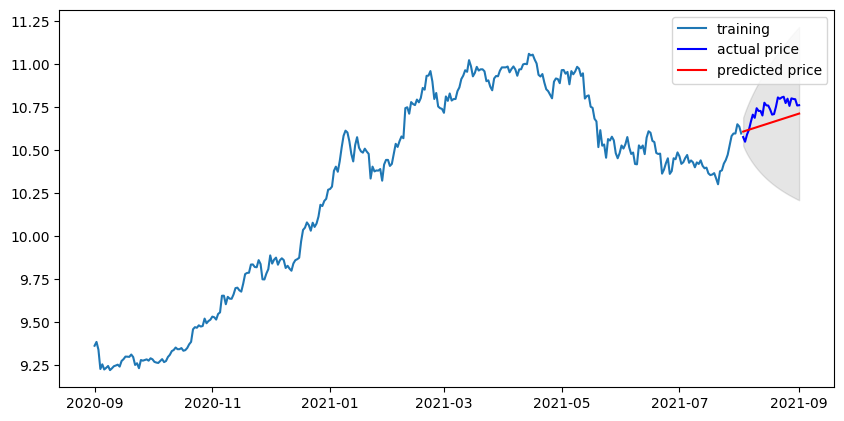

In [72]:
# Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [73]:
# ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  15317152.225795543
MAE:  3572.9916088269306
RMSE:  3913.7133550881754
MAPE: 7.62%


- Ï£ºÏãùÏù¥Îûë ÎπÑÏä∑Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÏßÄ ÏïäÏùÑÍπå ÌñàÎäîÎç∞ ÍΩ§ Îã§Î•∏ Î™®ÏñëÏúºÎ°ú Ï†ïÎ¶¨ÎêòÏóàÎã§
- ÏÇºÏÑ±Í≥º ÎπôÍ∑∏ÎûòÍ∞Ä Î™®Îëê ÏôÑÏ†Ñ AR Î™®Îç∏Ï≤òÎüº Ï†ïÎ¶¨ÎêòÏóàÎäîÎç∞
- Ïù¥Í±¥ ÌäπÏù¥ÌïòÍ≤å `p`ÏôÄ `q`Î•º Î™®Îëê Í∞ÄÏ†∏Í∞ÄÎäî ÌòïÌÉúÍ∞Ä ÎÇòÏôîÎã§

## ÏµúÏ¢Ö Í≤∞Í≥º (1, 1, 2) Ïùº Îïå 7.62%

---
---
---

# ÌöåÍ≥†

Ï§ëÍ∞ÑÏ§ëÍ∞Ñ ÏΩîÎ©òÌä∏Î°ú Î≠ò Ï†ÅÏñ¥ÏÑú ÌöåÍ≥†Ïóê Ïì∏ ÎßêÏù¥ Î≥ÑÎ°ú ÏóÜÍ∏¥ ÌïúÎç∞..

ÌîÑÎ°úÏ†ùÌä∏ Ï£ºÏ†úÎäî Ï£ºÍ∞Ä ÏòàÏ∏°Ïù¥Í∏∞Îäî ÌñàÏúºÎÇò ÎπôÍ∑∏Î†àÎ•º Ìï¥Î≥¥Í≥† ÎÇòÏÑúÎäî

Ï£ºÍ∞Ä Ïù¥Ïô∏Ïóê Îã§Î•∏ Í±∏ Ìï¥ÏïºÍ≤†Îã§ Ïã∂ÏóàÎã§.

Ïô∏Î∂Ä ÏöîÏù∏Ïù¥ ÎßéÏù¥ Ï†ÅÏö©ÎêòÏñ¥ ÎÇ†Îõ∞Îäî Ï¢ÖÎ™©ÏùÄ Í≤∞Í≥ºÍ∞Ä ÏïàÏ¢ãÏùÑÍ≤å ÎªîÌï¥ÏÑú Í≥†Î•¥Í≥† Ïã∂ÏßÄ ÏïäÏïòÍ≥†,

Ïñ¥ÎäêÏ†ïÎèÑ ÏïàÏ†ïÏ†ÅÏù∏ Ï¢ÖÎ™©Ïù¥ÎùºÎ©¥ Ï£ÑÎã§ ÎπÑÏä∑ÎπÑÏä∑Ìïú Í≤∞Í≥ºÎ•º ÎÇº Í≤É Í∞ôÏïòÏúºÎãàÍπå.

Í∑∏ÎûòÏÑú ÏãúÍ≥ÑÏó¥Î°ú ÏùòÎØ∏Í∞Ä ÏûàÎäî Í±∏ Ï∞æÏïÑÎã§ ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌñàÍ≥†

ÏΩîÎìú Î≥µÎ∂ôÌïòÎã§ Î°úÍ∑∏ Î≥ÄÌôò ÏßÄÏö∞ÎäîÍ±∞ ÍπåÎ®πÏñ¥ÏÑú MAPE 90% ÎèÑ Íµ¨Í≤ΩÌïòÎäî Îì±„Öã„Öã Ïó∞ÏäµÏù¥ ÎßéÏù¥ ÎêòÏóàÎã§.

ÎßàÏßÄÎßâ ÎπÑÌä∏ÏΩîÏù∏ÏùÄ, Ïñ¥Ï∞®Ìîº 3Í∞úÎäî Ï±ÑÏö¥ Í≤É Í∞ôÏúºÎãàÍπå 

Ïò§ÌûàÎ†§ ÎßéÏù¥ ÏôîÎã§Í∞îÎã§ ÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïç®Î≥¥Ïûê. Ïô∏Î∂Ä ÏöîÏù∏Ïóê ÏïÑÏ£º Ï∑®ÏïΩÌïú Í±∏ Ïç®Î≥¥Ïûê!

ÎùºÎäî ÏÉùÍ∞ÅÏúºÎ°ú Í≥®ÎûêÎäîÎç∞ Îî±Ìûà Í∑∏Î†áÏßÄÎßåÎèÑ ÏïäÏïòÎã§... „Öã„Öã„Öã

Ïù¥Î¶¨Ï†ÄÎ¶¨ Í≤ÄÏÉâÌï¥Í∞ÄÎ©¥ÏÑú ÌïÑÏöîÌïú ÏßÄÏãùÏùÑ Í∏∞ÏõåÍ∞ÄÎäîÎç∞ ÌÜµÍ≥Ñ Î≤†Ïù¥Ïä§Í∞Ä Î∂ÄÏ°±ÌïúÍ±∏ ÎÑàÎ¨¥ Ïã§Í∞êÌñàÍ≥†„Ö†„Ö†

Î≠ê ÌïòÎÇò Ìï† ÎïåÎßàÎã§ Îß§Î≤à Î∂ÄÏ°±Ìï®Îßå ÎäêÎÅºÍ≥† ÏûàÎã§üòÇ